In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

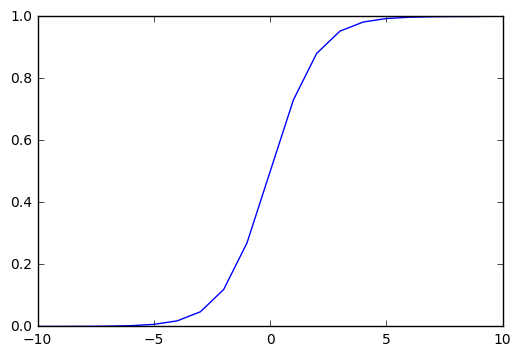

In [2]:
fig = plt.figure()

X = np.arange(-10,10)
Y = np.array([1.0/(1+np.exp(-x)) for x in X])

plt.plot(X,Y)
plt.show()

In [3]:
random.uniform(0.5,1)

0.6783198123092378

In [6]:
X1 = [i for i in range(100)]
#X2 = [1.0/(1+np.exp(10-0.2*i)) for i in X1]
X2 = [5+3*i+10*np.random.normal() if i%2 == 0 else 100+3.5*i+10*np.random.normal() for i in range(100)]

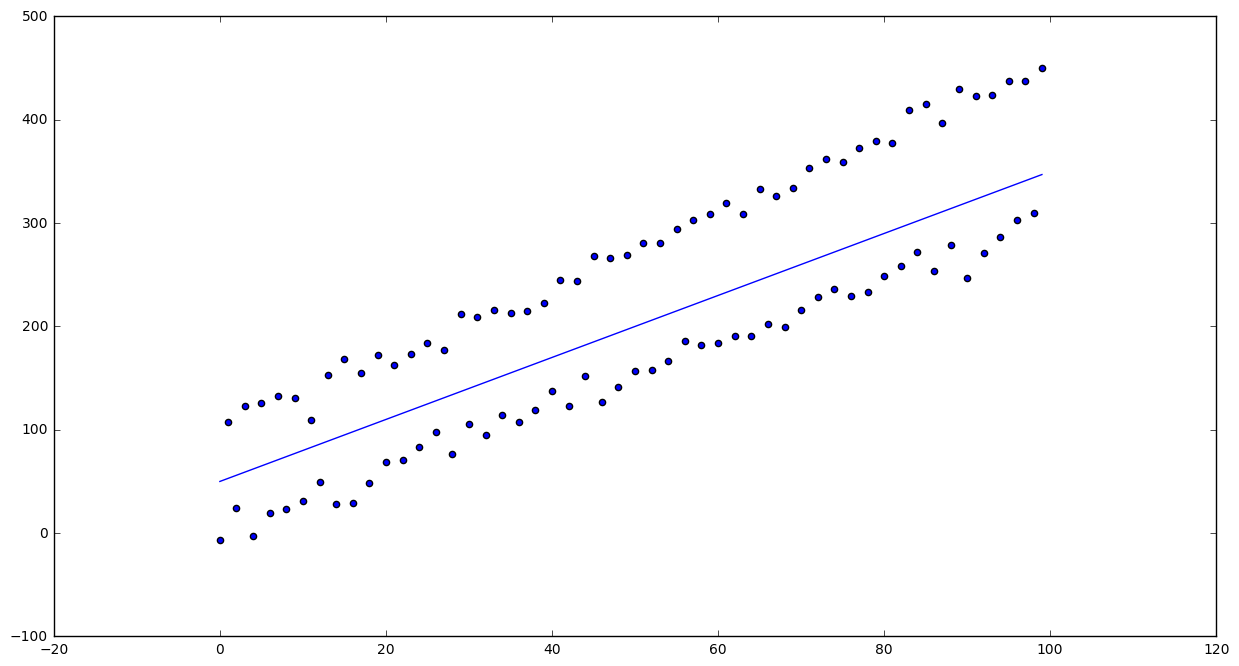

In [10]:
#y_train = [1 if i > 0.5 else 0 for i in y_train]
plt.figure(figsize=(15,8))
plt.scatter(X1,X2)
plt.plot(X1,[50 + 3*i for i in range(100)])
plt.show()

y_train = []
for index, x in enumerate(X2):
    if x > 50 + 3*X1[index]:
        y_train.append(1)
    else:
        y_train.append(0)

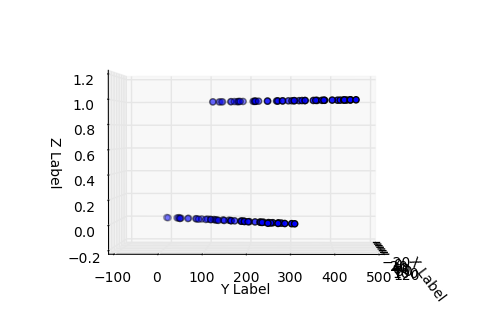

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for y in y_train:
#    xs = X1
#    ys = X2
#    zs = y
ax.scatter(X1,X2,y_train)
ax.view_init(1, 1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [19]:
theta = np.array([0,0,0])

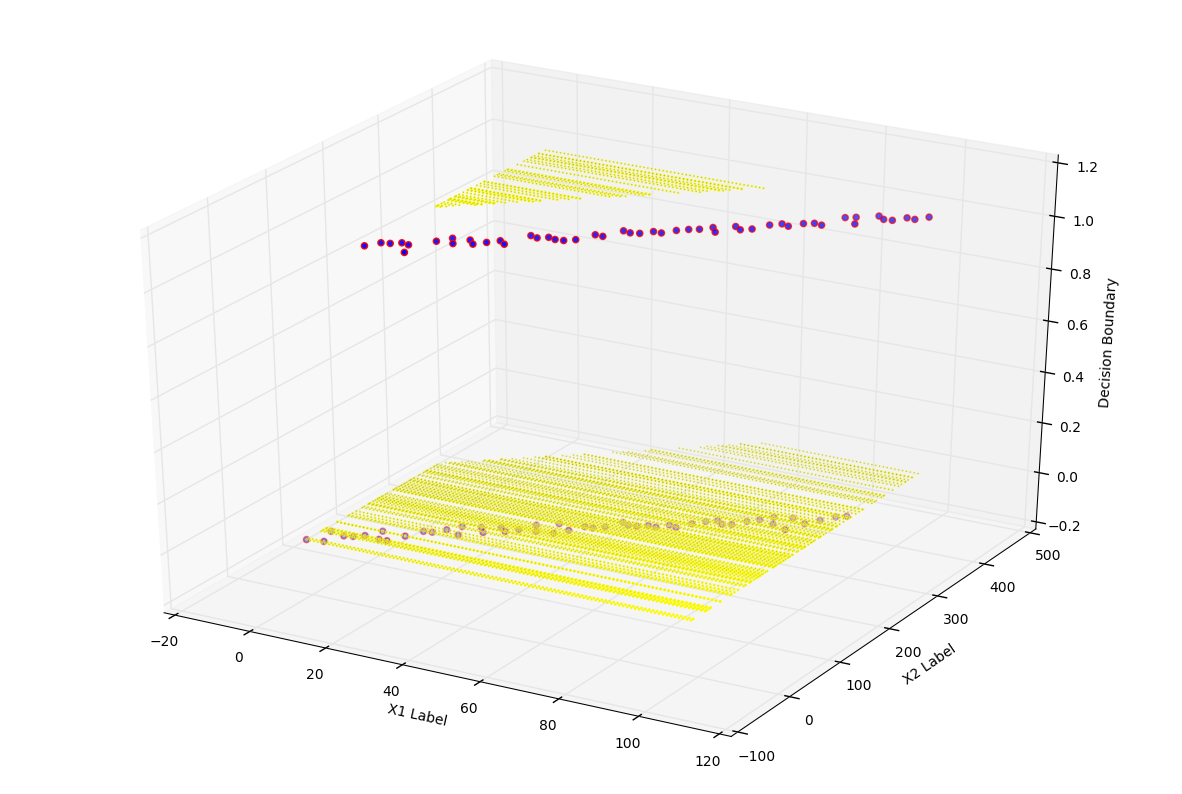

Cost:  7.30088322907e-05


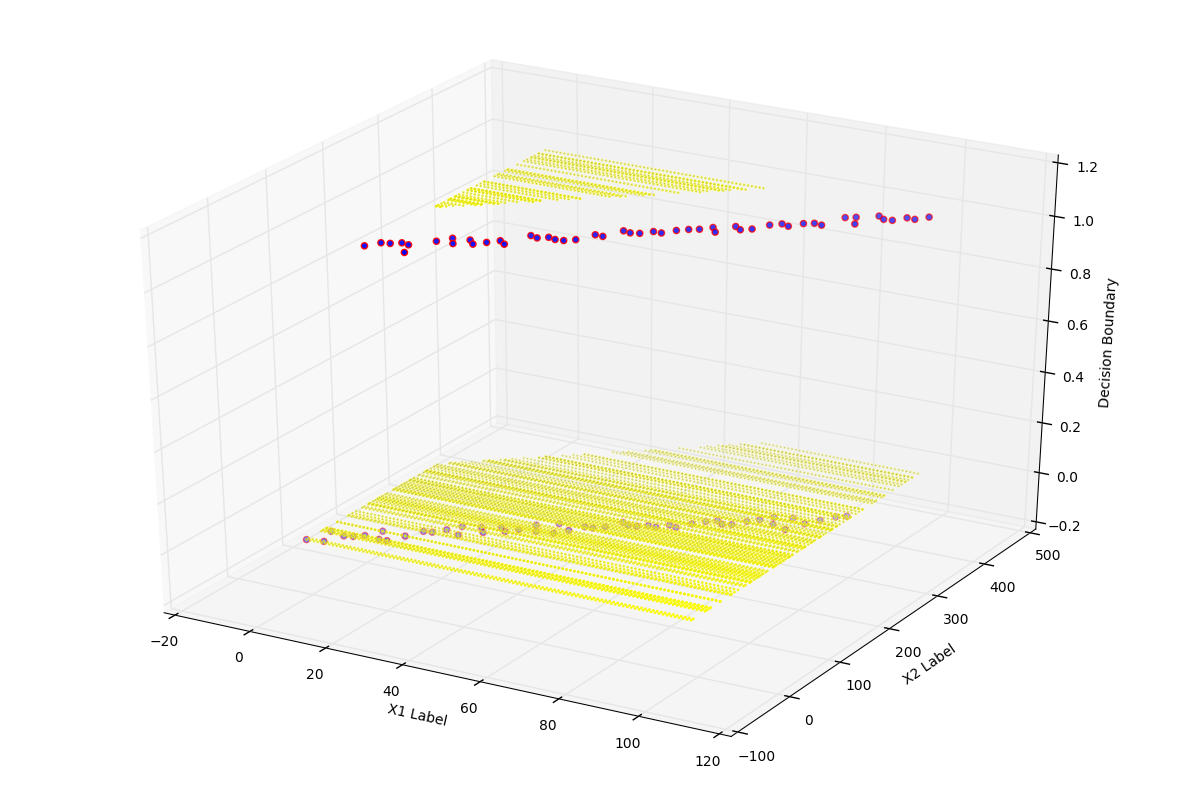

Cost:  7.15643120792e-05


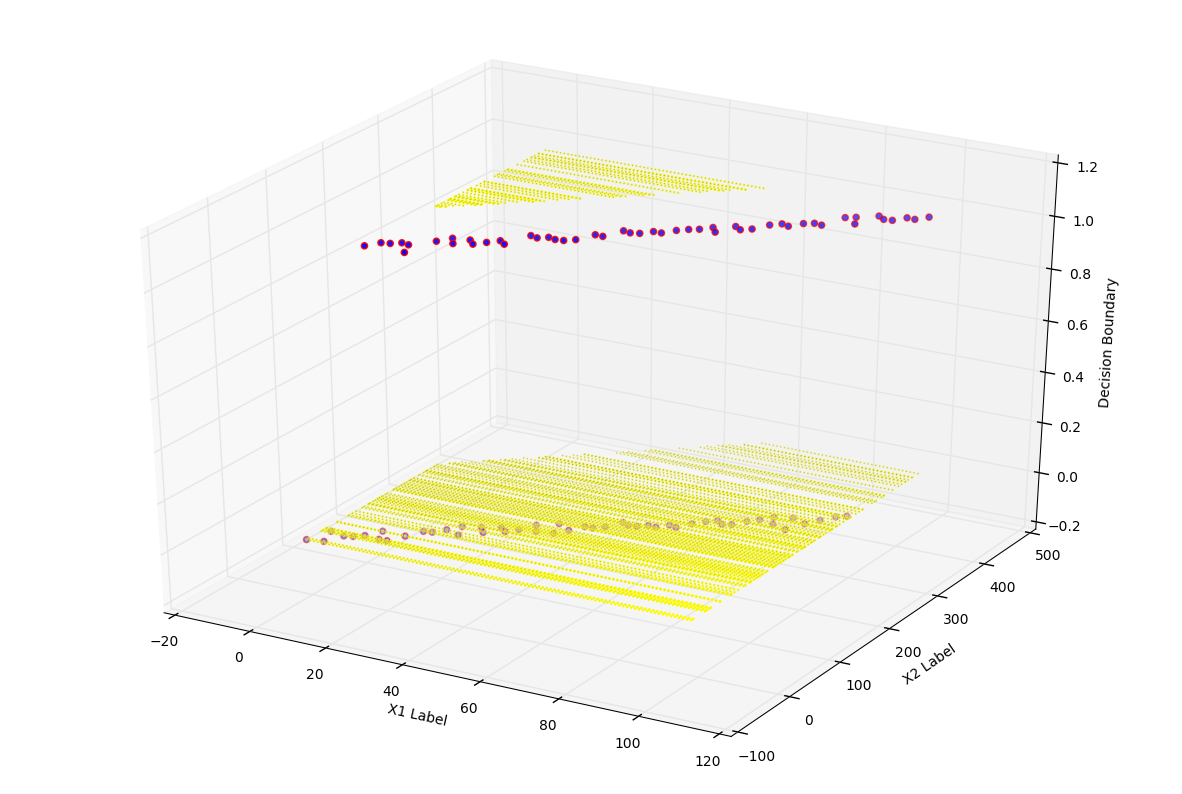

Cost:  7.01636090437e-05


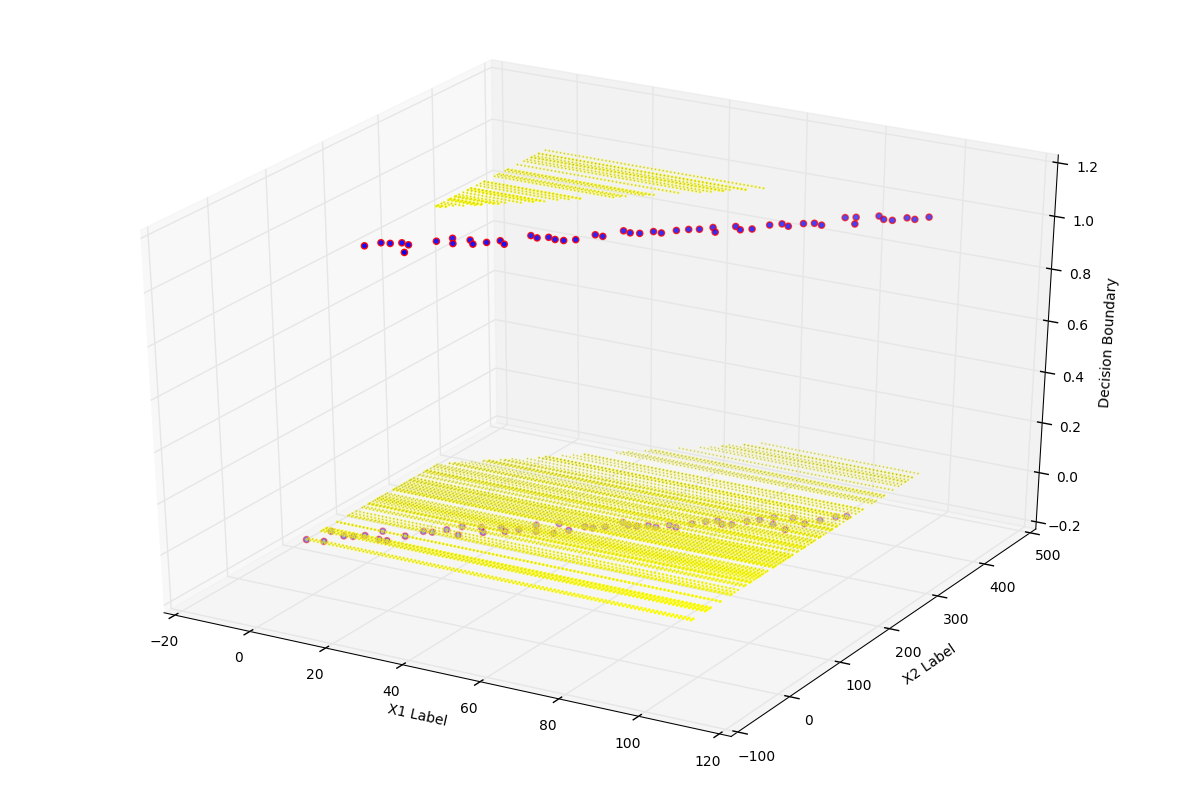

Cost:  6.88049897106e-05


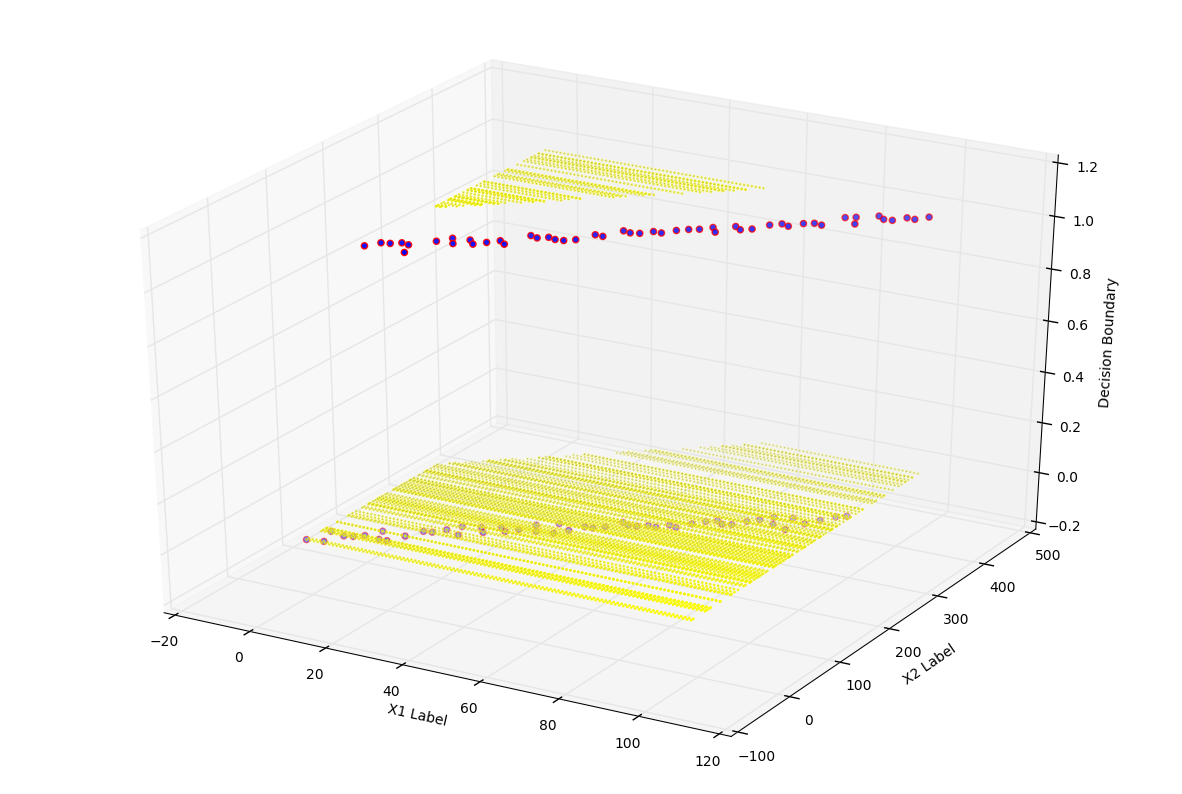

Cost:  6.74868015681e-05


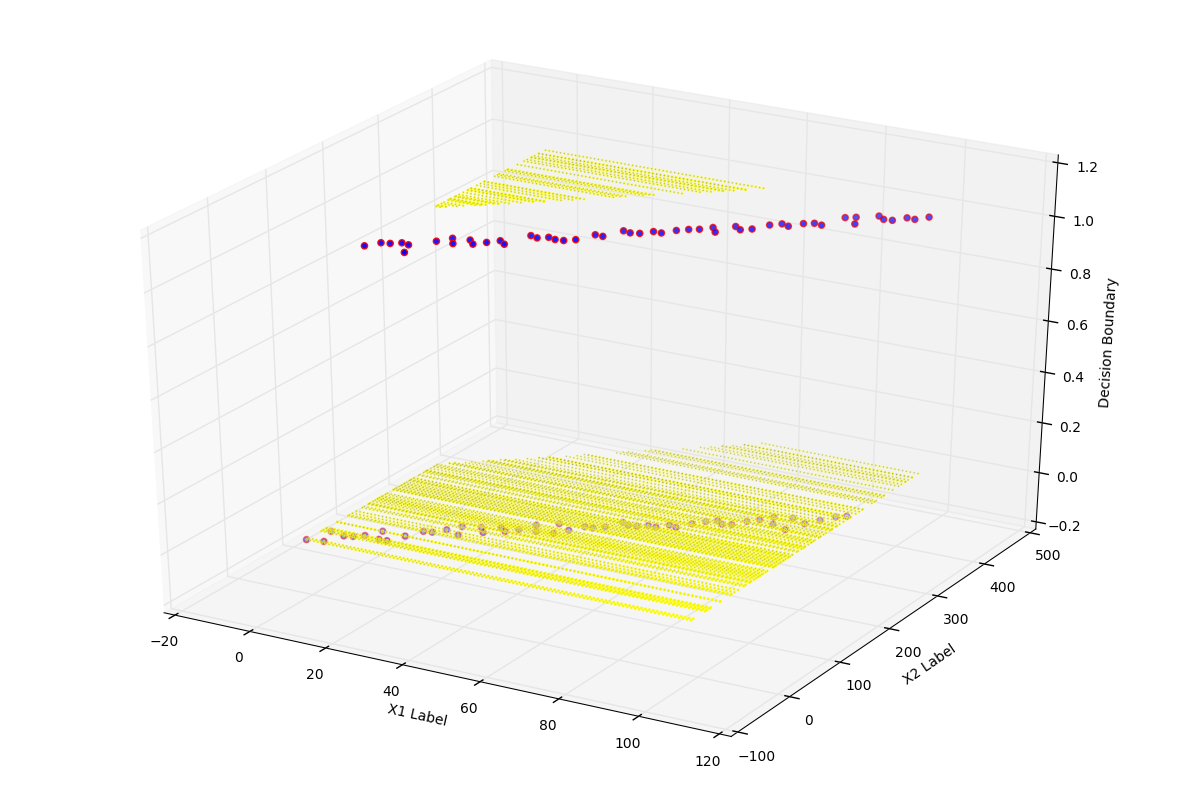

Cost:  6.62074689938e-05


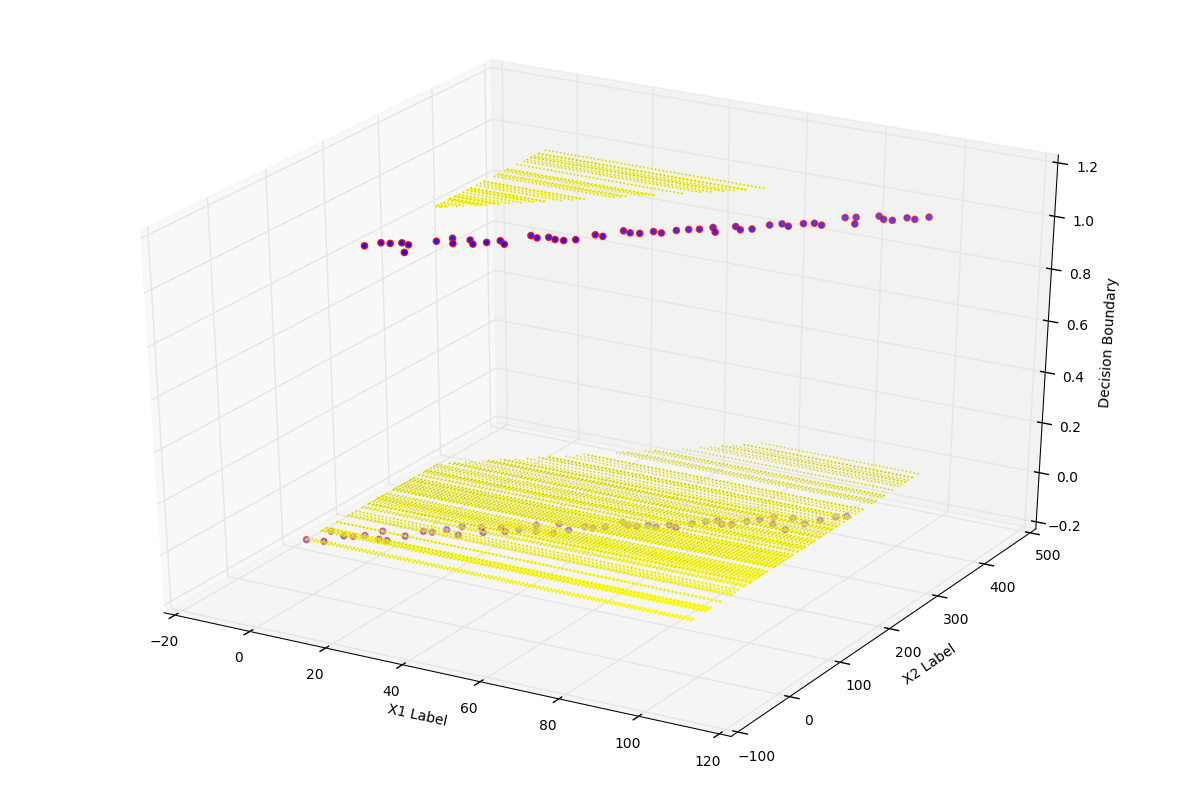

Cost:  6.49654893707e-05


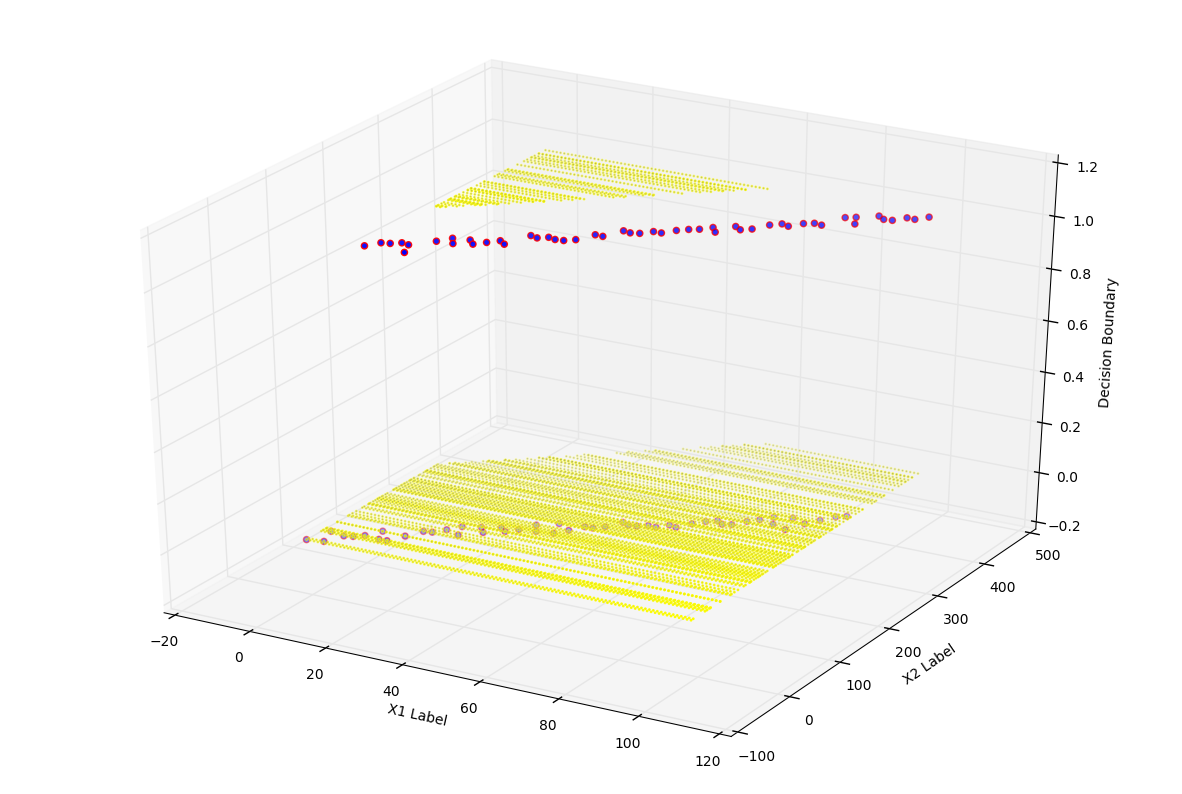

Cost:  6.3759429388e-05


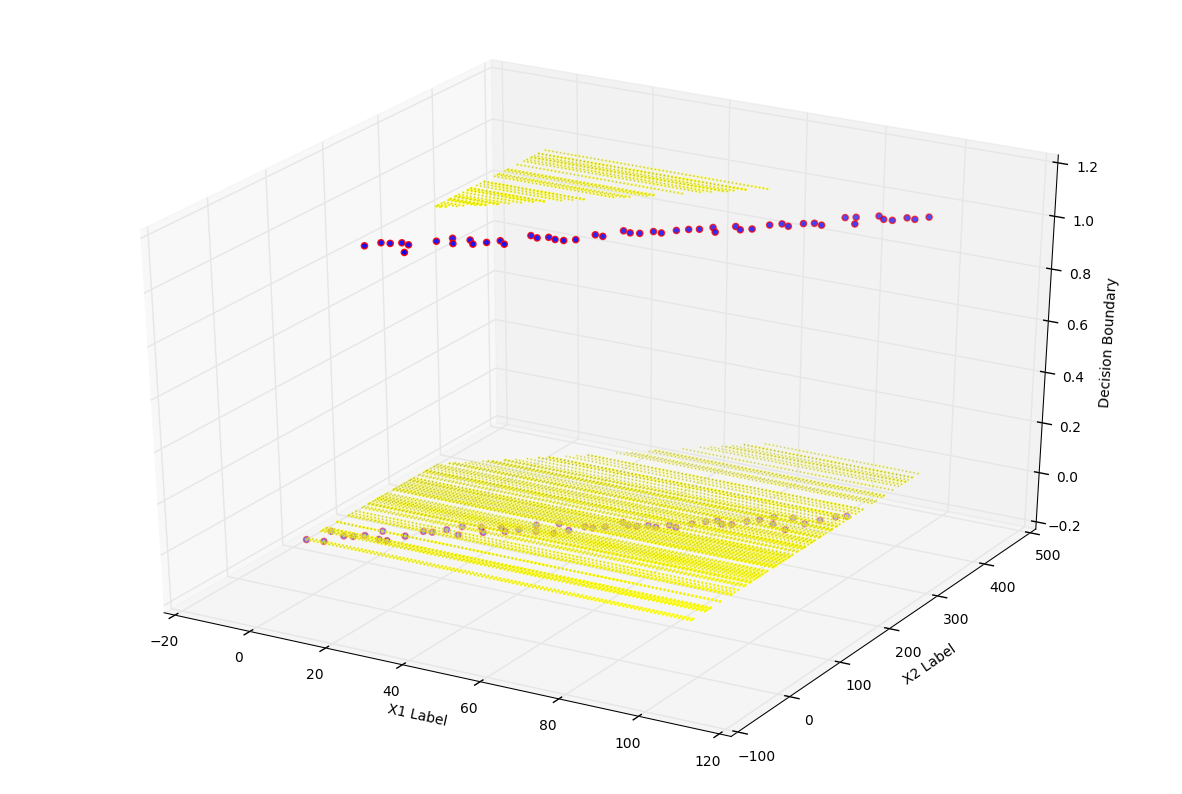

Cost:  6.25879215236e-05


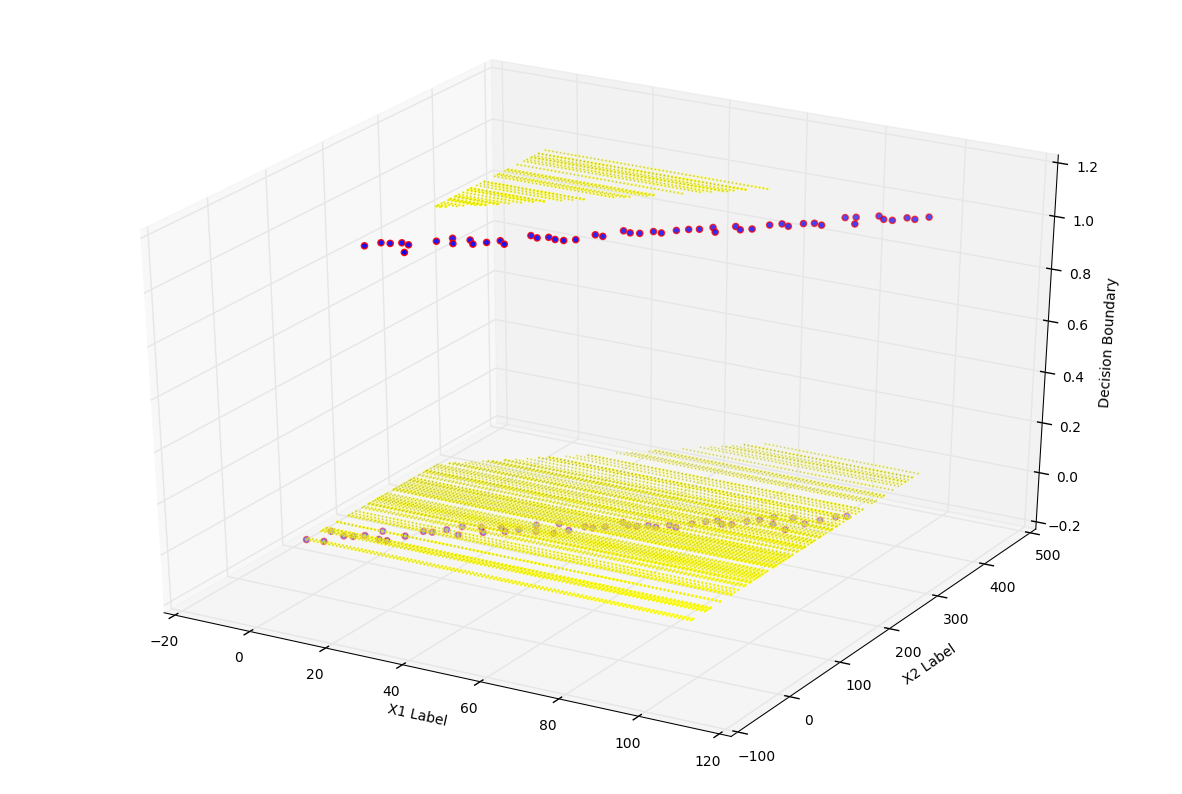

Cost:  6.14496607021e-05


In [42]:
#SGD
eta = 0.001
costs = []
for i in range(5000):
    for index,j in enumerate(X1):
        ycap = 1.0/(1+np.exp(-np.dot(theta,[1,j,X2[index]])))
        cost = -(y_train[index]*np.log(ycap) + (1-y_train[index])*np.log(1-ycap))
        costs.append(cost)
        theta = theta - eta * (-y_train[index] * (1-ycap) + ycap * (1 - y_train[index])) * np.array([1,j,X2[index]])
    if i%500 == 0:
        X, Y = np.meshgrid(X1, X2)
        Z = np.array([i for i in X])
        Z.reshape(X.shape)
        for xindex, xk in enumerate(X):
            for yindex, yk in enumerate(xk):
                Z[xindex][yindex] = 1.0/(1+np.exp(-np.dot(theta,[1,yk,Y[xindex][yindex]])))

        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection='3d')

        #ax.plot_surface(X, Y, Z)
        ax.scatter(X, Y, Z, color='yellow',s=1)
        #print Z
        ax.set_xlabel('X1 Label')
        ax.set_ylabel('X2 Label')
        ax.set_zlabel('Decision Boundary')
        ax.scatter(X1,X2,y_train,color='red',s=20)
        plt.show()
        print "Cost: ",cost

In [29]:
theta

array([-5.25347913, -0.60399892,  0.16405575])

In [30]:
y_pred = []
for i in range(100):
    yp = np.dot(theta,[1,X1[i],X2[i]])
    if yp > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

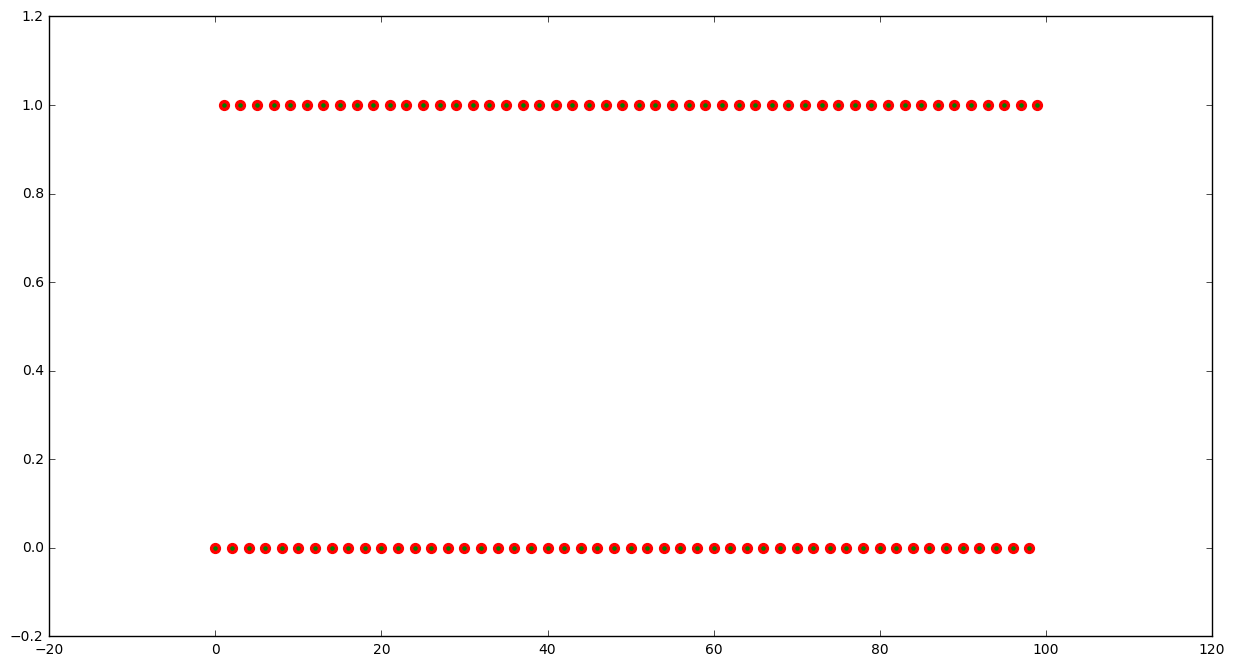

In [38]:
fig = plt.figure(figsize=(15,8))
plt.scatter(range(100),y_pred, color='red',s=50)
plt.scatter(range(100),y_train, color='green',s=5)
plt.show()

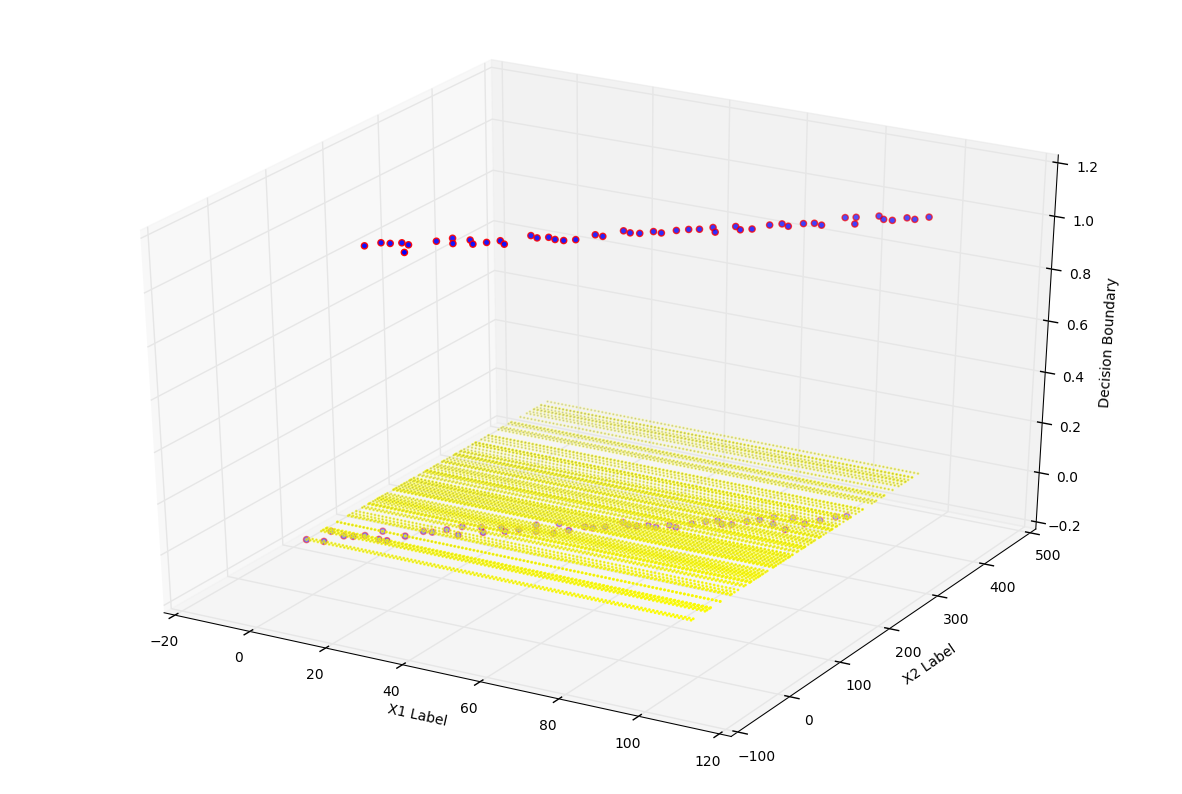

Cost:  15.4233572105


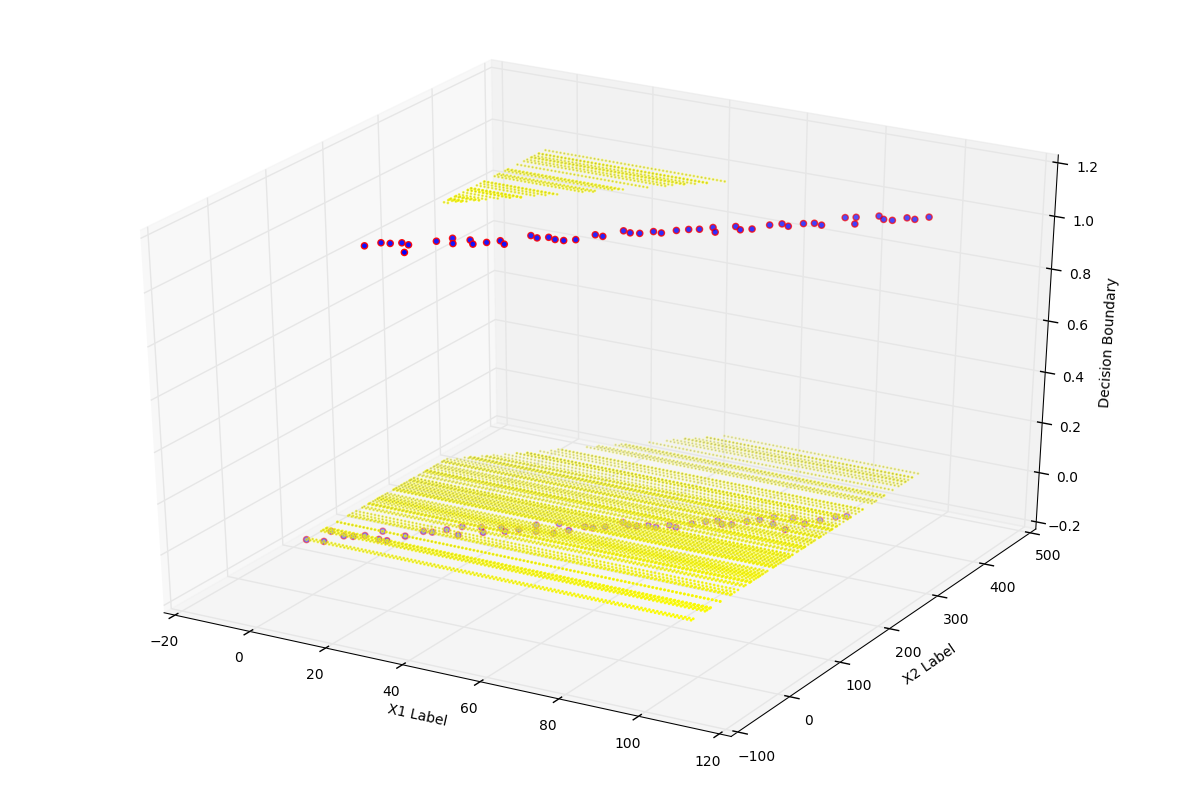

Cost:  0.184634531497


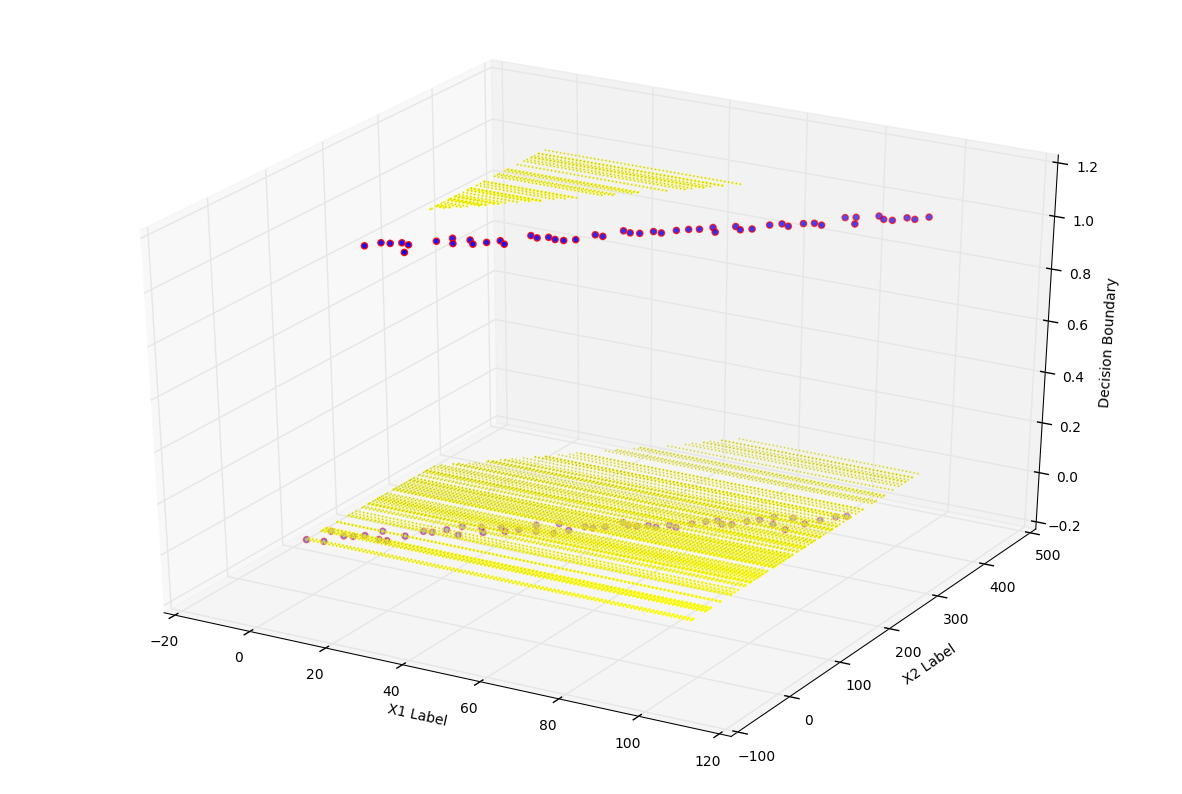

Cost:  0.156506741483


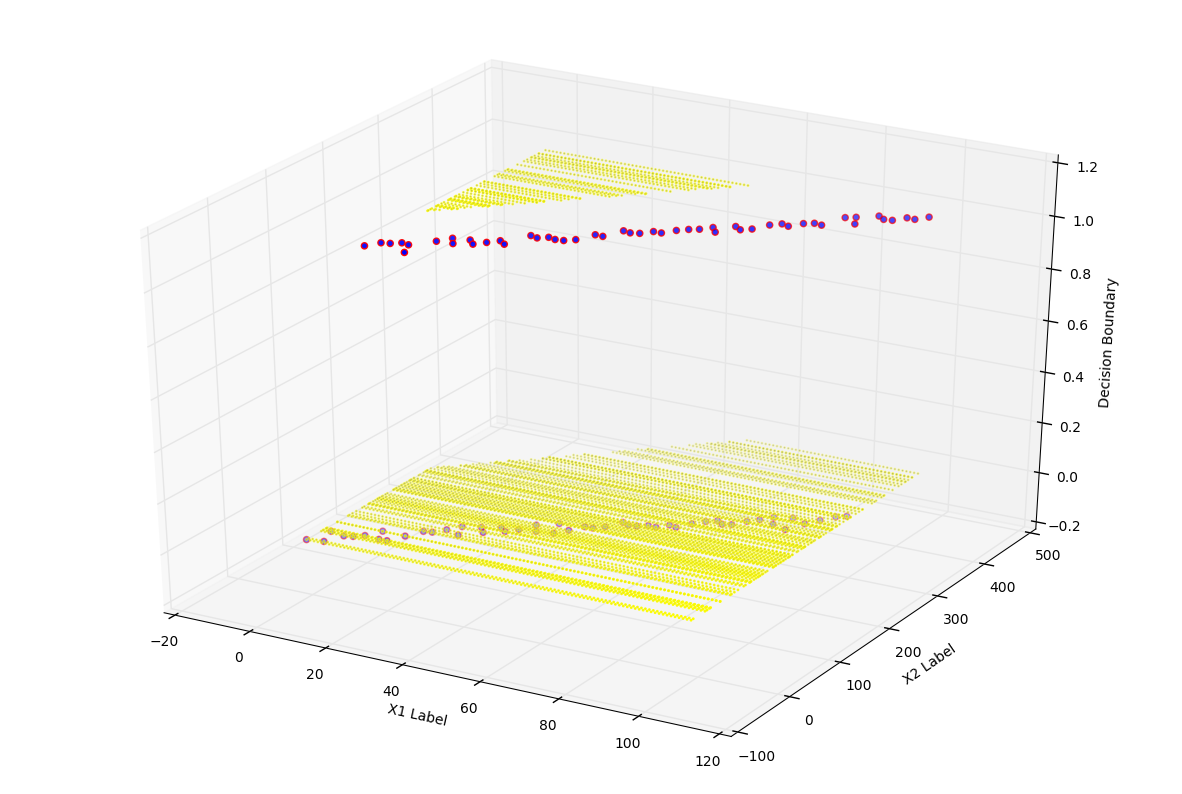

Cost:  0.143715270007


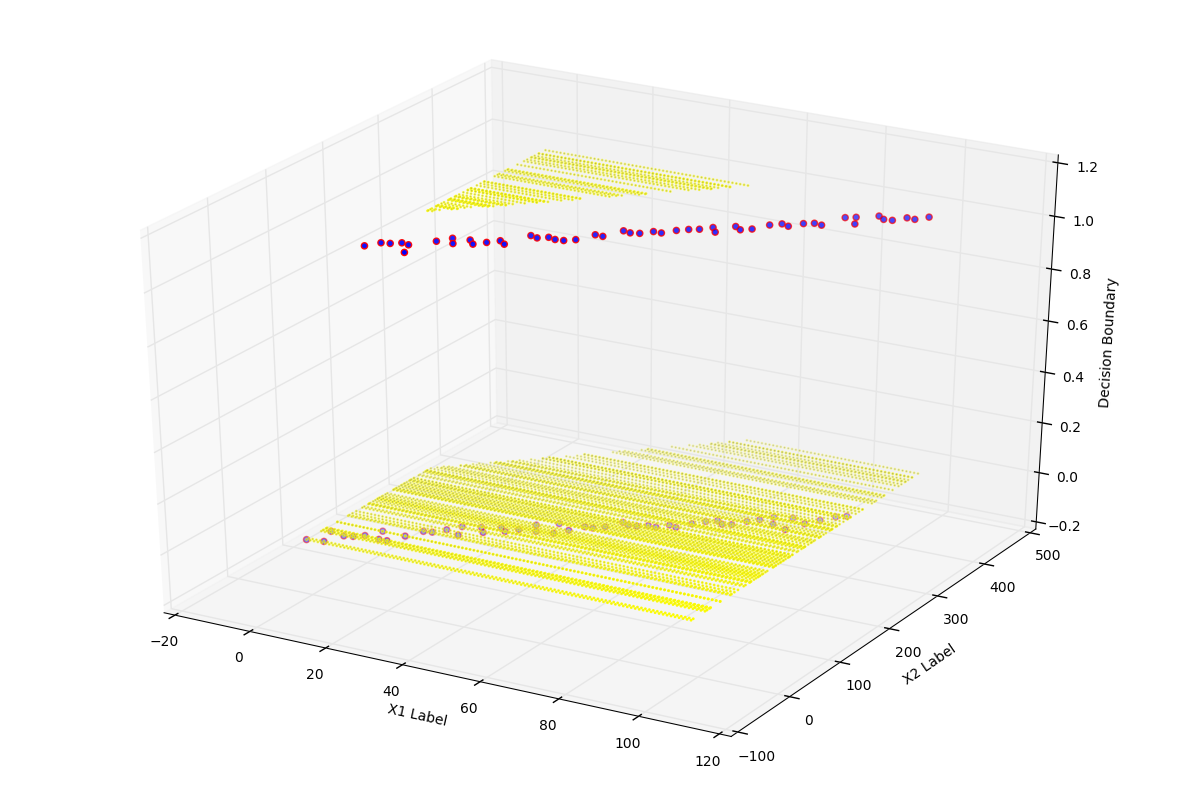

Cost:  0.135938335387


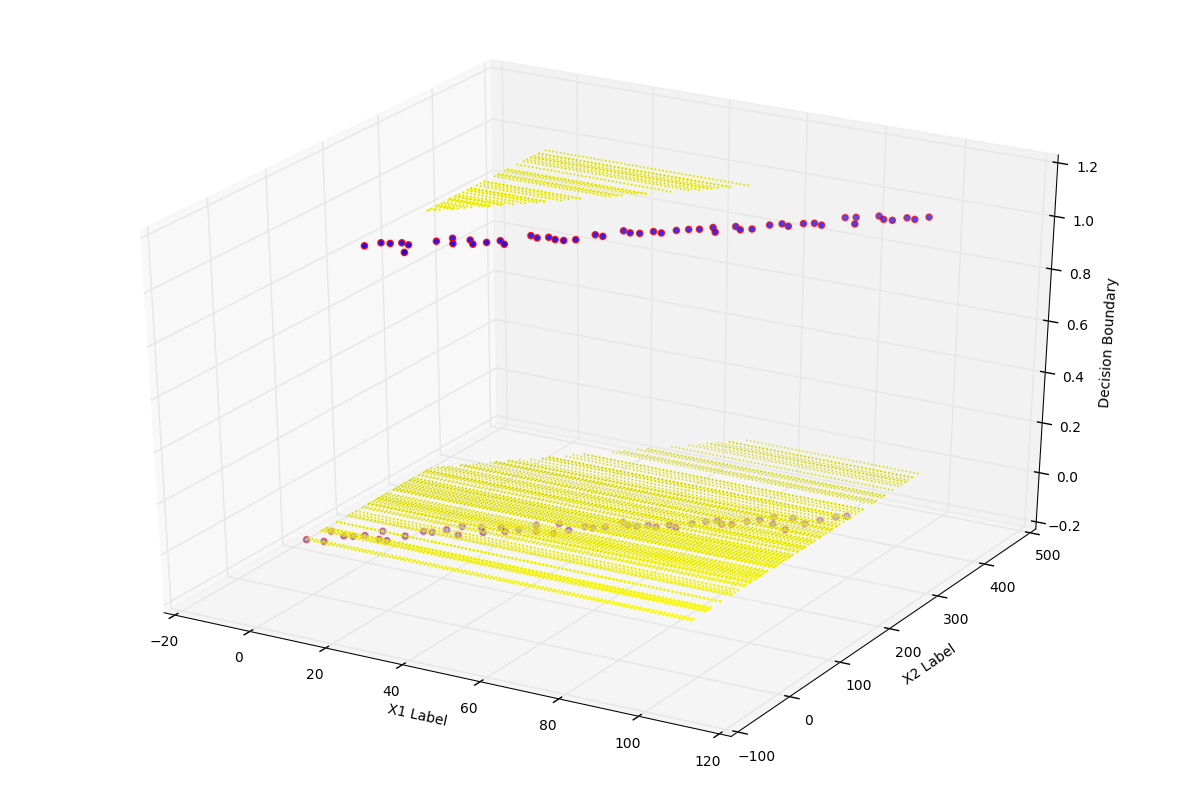

Cost:  0.130328718716


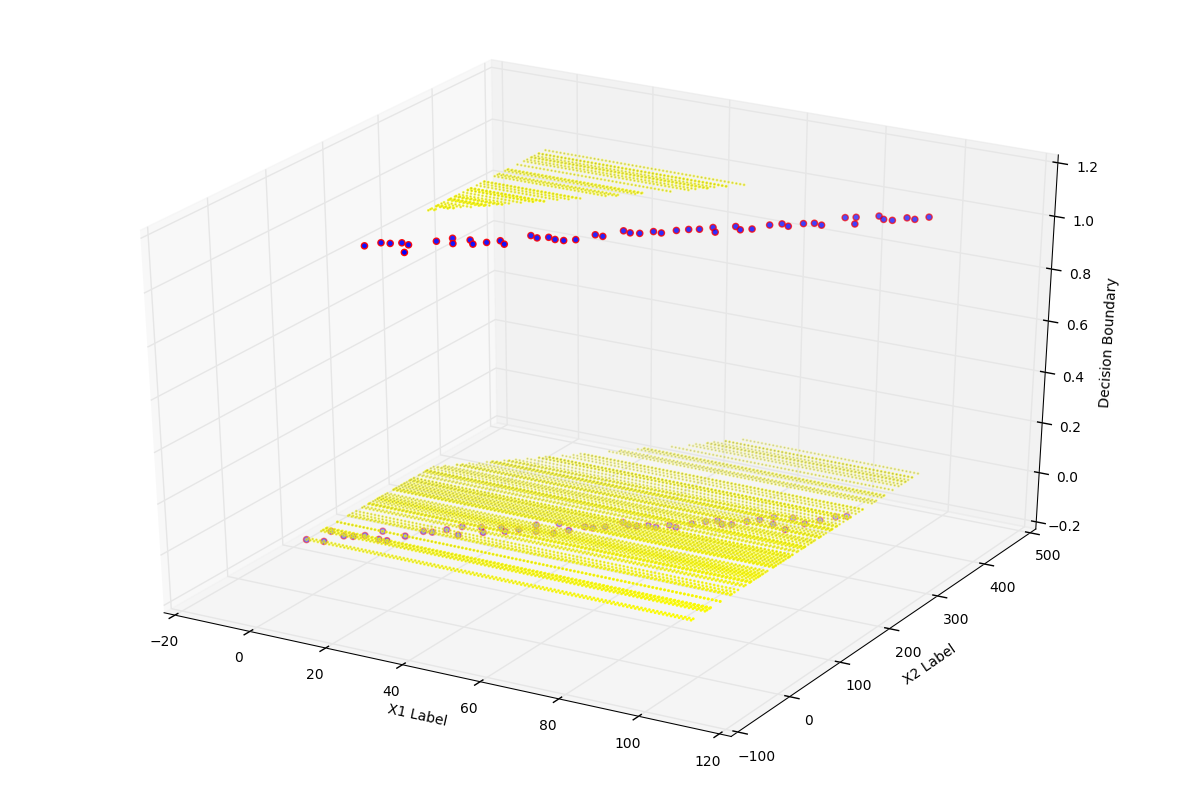

Cost:  0.125776750725


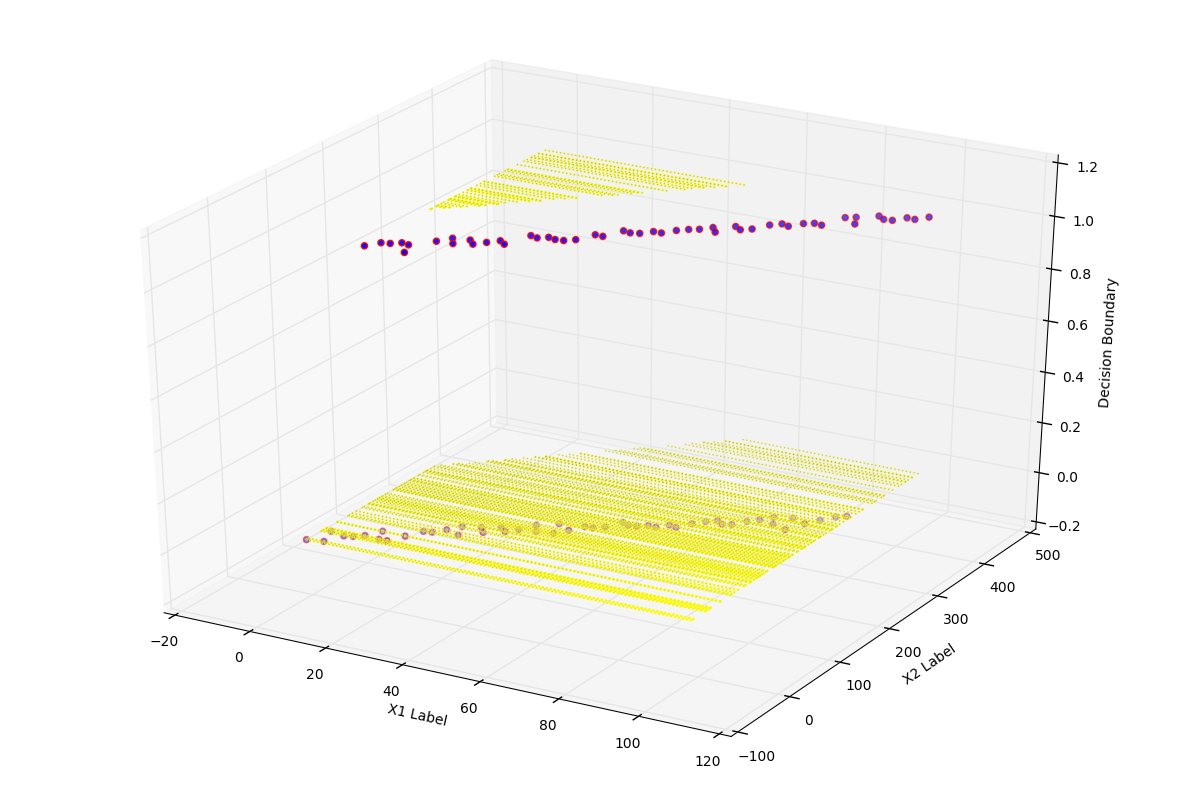

Cost:  0.121766750821


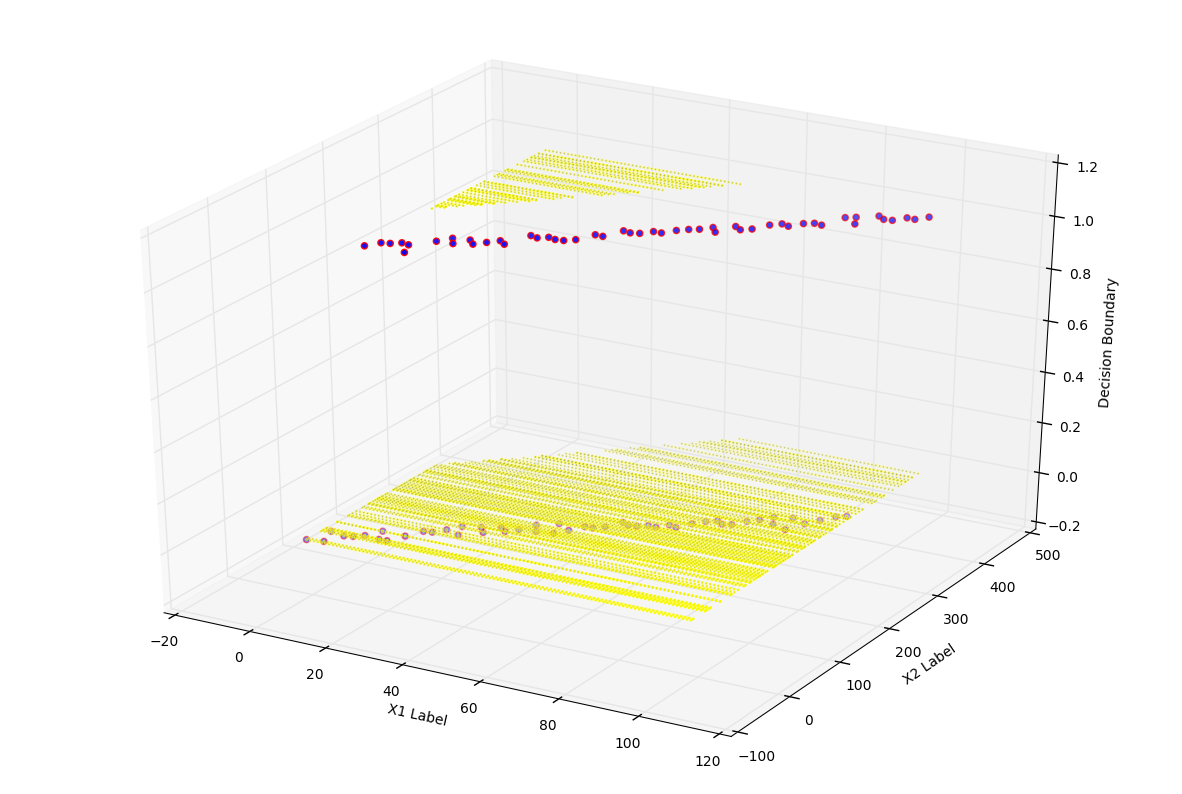

Cost:  0.118038906404


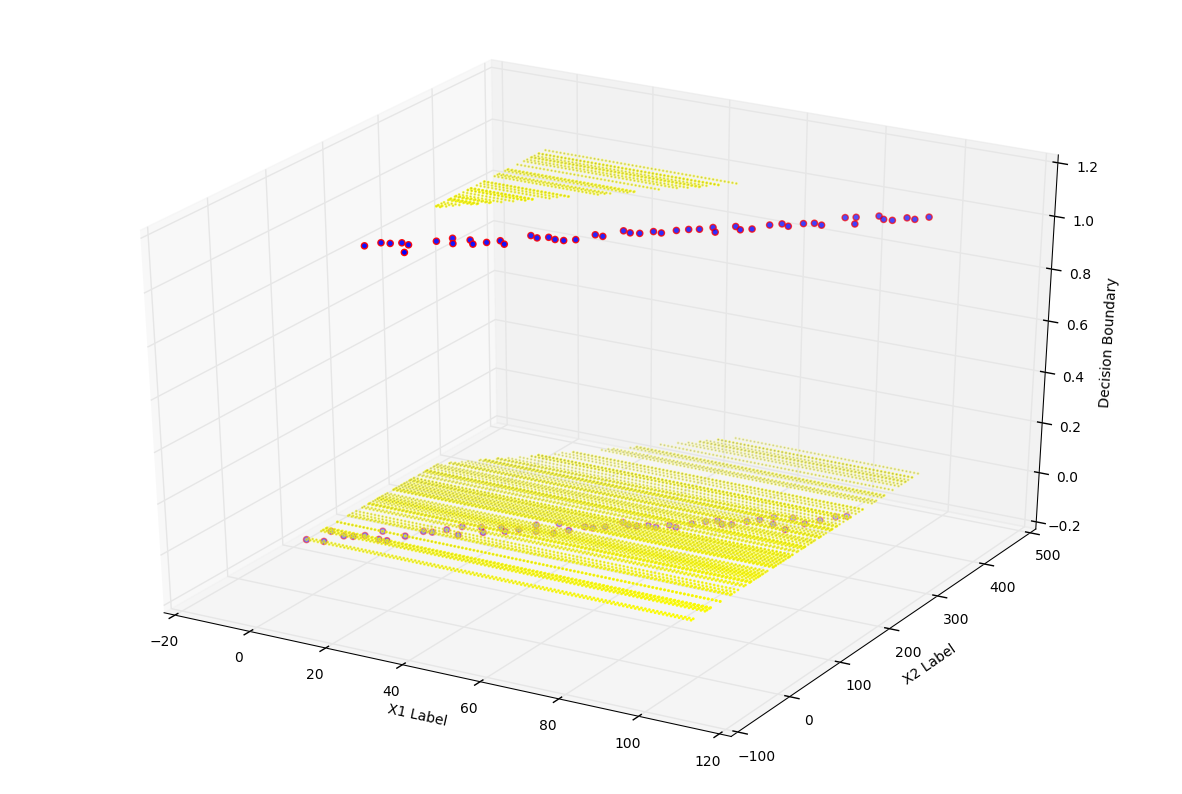

Cost:  0.11446054602


In [44]:
theta = np.array([0,0,0])
#Mini-Batch
epoch = 10000
batch = 20
eta = 0.001
costs = []
for i in range(epoch):
    for j in range(0,len(X1),batch):
        cost = 0
        cost_derivative = np.array([0,0,0])
        for index in range(j,j+batch):
            ycap = 1.0/(1+np.exp(-np.dot(theta,[1,X1[index],X2[index]])))
            cost += -(y_train[index]*np.log(ycap+0.00001) + (1-y_train[index])*np.log(1.00001-ycap))
            cost_derivative = cost_derivative + (ycap - y_train[index]) * np.array([1,X1[index],X2[index]])
        costs.append(cost/float(batch))
        theta = theta - (eta/float(batch)) * cost_derivative
    if i%1000 == 0:
        X, Y = np.meshgrid(X1, X2)
        Z = np.array([i for i in X])
        Z.reshape(X.shape)
        for xindex, xk in enumerate(X):
            for yindex, yk in enumerate(xk):
                Z[xindex][yindex] = 1.0/(1+np.exp(-np.dot(theta,[1,yk,Y[xindex][yindex]])))

        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection='3d')

        #ax.plot_surface(X, Y, Z)
        ax.scatter(X, Y, Z, color='yellow',s=1)
        #print Z
        ax.set_xlabel('X1 Label')
        ax.set_ylabel('X2 Label')
        ax.set_zlabel('Decision Boundary')
        ax.scatter(X1,X2,y_train,color='red',s=20)
        plt.show()
        print "Cost: ",cost

In [45]:
theta

array([-0.96613084, -0.64192095,  0.15500779])

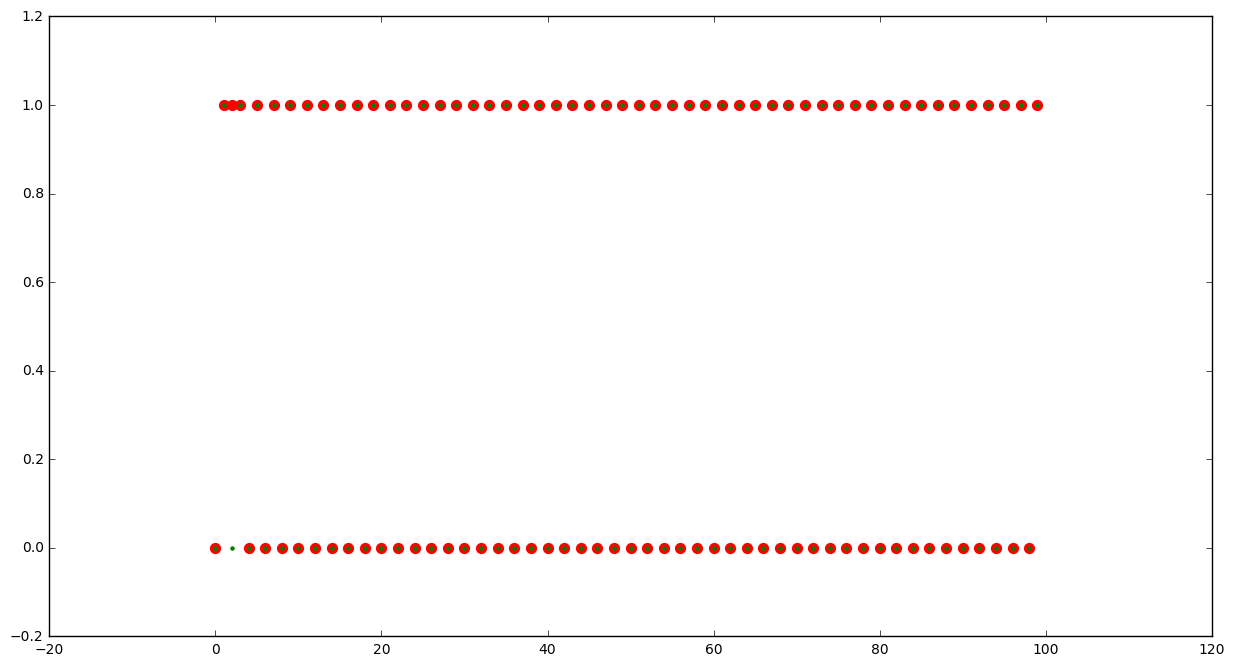

In [46]:
y_pred = []
for i in range(100):
    yp = np.dot(theta,[1,X1[i],X2[i]])
    if yp > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

fig = plt.figure(figsize=(15,8))
plt.scatter(range(100),y_pred, color='red',s=50)
plt.scatter(range(100),y_train, color='green',s=5)
plt.show()